## #01. 방문자수, 업종별 지출액 - 준비작업
### [1] 패키지 가져오기

In [1]:
from pandas import read_excel, DataFrame
from sklearn.impute import SimpleImputer
import numpy as np

import sys
import seaborn as sb
from matplotlib import pyplot as plt
import requests
from IPython.display import SVG
from bs4 import BeautifulSoup

### [2] 데이터 가져오기

In [2]:
origin = read_excel("2023관광외국인.xlsx")
origin.head()

,광역시도,내/외국인,서울/그외,방문자수,총지출액,쇼핑업지출액,숙박업지출액,식음료업지출액,여가서비스업지출액,여행업지출액,운송업지출액
0,서울특별시,외국인,서울,8977179.0,3856403320,1778874339,968776600,755894696,326633789,7057795,19166101
1,부산광역시,외국인,그외,2210376.0,444899971,214505572,72991159,73455474,83108820,151071,687875
2,대구광역시,외국인,그외,335036.0,49268238,21082824,13119634,14403522,311389,114654,236215
3,인천광역시,외국인,그외,5576179.0,513453356,192600792,230653415,83801324,520109,116981,5760735
4,광주광역시,외국인,그외,126989.0,16372319,7608683,2674535,5573774,470083,4478,40766


In [3]:
origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   광역시도       17 non-null     object 
 1   내/외국인      17 non-null     object 
 2   서울/그외      17 non-null     object 
 3   방문자수       16 non-null     float64
 4   총지출액       17 non-null     int64  
 5   쇼핑업지출액     17 non-null     int64  
 6   숙박업지출액     17 non-null     int64  
 7   식음료업지출액    17 non-null     int64  
 8   여가서비스업지출액  17 non-null     int64  
 9   여행업지출액     17 non-null     int64  
 10  운송업지출액     17 non-null     int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 1.6+ KB


## #02. 방문자수, 업종별 지출액 - 데이터 전처리(정제)
### [1] 결측치 확인 및 처리
- 강원도방문자수 평균값으로 대체

In [4]:
empty = origin.isnull()
empty.sum()

광역시도         0
내/외국인        0
서울/그외        0
방문자수         1
총지출액         0
쇼핑업지출액       0
숙박업지출액       0
식음료업지출액      0
여가서비스업지출액    0
여행업지출액       0
운송업지출액       0
dtype: int64

In [5]:
df = origin.drop(['광역시도', '내/외국인', '서울/그외'], axis=1)

In [6]:
imr = SimpleImputer(missing_values=np.nan, strategy='mean')
imr

SimpleImputer()

In [7]:
df_imr = imr.fit_transform(df.values)
df_imr

array([[8.97717900e+06, 3.85640332e+09, 1.77887434e+09, 9.68776600e+08,
        7.55894696e+08, 3.26633789e+08, 7.05779500e+06, 1.91661010e+07],
       [2.21037600e+06, 4.44899971e+08, 2.14505572e+08, 7.29911590e+07,
        7.34554740e+07, 8.31088200e+07, 1.51071000e+05, 6.87875000e+05],
       [3.35036000e+05, 4.92682380e+07, 2.10828240e+07, 1.31196340e+07,
        1.44035220e+07, 3.11389000e+05, 1.14654000e+05, 2.36215000e+05],
       [5.57617900e+06, 5.13453356e+08, 1.92600792e+08, 2.30653415e+08,
        8.38013240e+07, 5.20109000e+05, 1.16981000e+05, 5.76073500e+06],
       [1.26989000e+05, 1.63723190e+07, 7.60868300e+06, 2.67453500e+06,
        5.57377400e+06, 4.70083000e+05, 4.47800000e+03, 4.07660000e+04],
       [1.80601000e+05, 3.75633630e+07, 8.00178000e+06, 8.66464900e+06,
        6.42719400e+06, 1.07498000e+05, 2.39090000e+04, 1.43383330e+07],
       [3.59862000e+05, 1.39509550e+07, 3.50540800e+06, 7.14977600e+06,
        3.15986900e+06, 1.10737000e+05, 8.52200000e+03, 1.

In [8]:
re_df = DataFrame(df_imr, index=df.index, columns=df.columns)
re_df.describe()

,방문자수,총지출액,쇼핑업지출액,숙박업지출액,식음료업지출액,여가서비스업지출액,여행업지출액,운송업지출액
count,1.700000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.700000e+01
mean,1.626357e+06,3.422996e+08,1.471314e+08,9.138798e+07,7.313884e+07,2.607927e+07,5.487916e+05,4.013350e+06
std,2.385454e+06,9.233381e+08,4.268480e+08,2.341793e+08,1.807630e+08,7.999311e+07,1.699022e+06,6.540065e+06
min,5.175800e+04,2.444527e+06,4.183880e+05,6.310940e+05,1.343578e+06,4.759900e+04,3.733000e+03,1.350000e+02
25%,3.350360e+05,1.637232e+07,4.351206e+06,5.399887e+06,5.592475e+06,3.113890e+05,8.522000e+03,1.041350e+05
50%,6.172070e+05,3.756336e+07,7.608683e+06,9.482350e+06,1.242752e+07,6.296100e+05,2.651500e+04,2.736050e+05
75%,1.626357e+06,1.972879e+08,5.256780e+07,5.295482e+07,7.096655e+07,3.312939e+06,1.169810e+05,5.760735e+06
max,8.977179e+06,3.856403e+09,1.778874e+09,9.687766e+08,7.558947e+08,3.266338e+08,7.057795e+06,1.916610e+07


### [2] 방문자수, 지출액 > 천명, 백만원 단위로 변경

In [9]:
df2 = origin[['광역시도', '내/외국인', '서울/그외']]

for i, v in enumerate(re_df.columns):
    df2[v] = re_df[v].divide(1000)

/var/folders/7s/11f9ngv16yd4rmc74hx3y3w80000gp/T/ipykernel_79962/4189199135.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[v] = re_df[v].divide(1000)
/var/folders/7s/11f9ngv16yd4rmc74hx3y3w80000gp/T/ipykernel_79962/4189199135.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[v] = re_df[v].divide(1000)
/var/folders/7s/11f9ngv16yd4rmc74hx3y3w80000gp/T/ipykernel_79962/4189199135.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

### [3] 데이터 타입 변경

In [10]:
df2= df2.astype({'광역시도' : 'category', '내/외국인' : 'category', '서울/그외' : 'category'})
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   광역시도       17 non-null     category
 1   내/외국인      17 non-null     category
 2   서울/그외      17 non-null     category
 3   방문자수       17 non-null     float64 
 4   총지출액       17 non-null     float64 
 5   쇼핑업지출액     17 non-null     float64 
 6   숙박업지출액     17 non-null     float64 
 7   식음료업지출액    17 non-null     float64 
 8   여가서비스업지출액  17 non-null     float64 
 9   여행업지출액     17 non-null     float64 
 10  운송업지출액     17 non-null     float64 
dtypes: category(3), float64(8)
memory usage: 2.2 KB


### [4] 기술통계량 확인

In [11]:
df2.describe

<bound method NDFrame.describe of        광역시도 내/외국인 서울/그외         방문자수         총지출액       쇼핑업지출액      숙박업지출액  \
0     서울특별시   외국인    서울  8977.179000  3856403.320  1778874.339  968776.600   
1     부산광역시   외국인    그외  2210.376000   444899.971   214505.572   72991.159   
2     대구광역시   외국인    그외   335.036000    49268.238    21082.824   13119.634   
3     인천광역시   외국인    그외  5576.179000   513453.356   192600.792  230653.415   
4     광주광역시   외국인    그외   126.989000    16372.319     7608.683    2674.535   
5     대전광역시   외국인    그외   180.601000    37563.363     8001.780    8664.649   
6     울산광역시   외국인    그외   359.862000    13950.955     3505.408    7149.776   
7   세종특별자치시   외국인    그외    51.758000     2444.527      418.388     631.094   
8       경기도   외국인    그외  3541.064000   500444.008   178954.454  136321.843   
9       강원도   외국인    그외  1626.356875    38973.652     4151.907   18740.804   
10     충청북도   외국인    그외   308.688000    15859.822     4158.360    5399.887   
11     충청남도   외국인    그외   619.

## #03. 방문자수, 업종별 지출액 - 데이터 시각화
### [1] 방문자수 분포

In [12]:
plt.rcParams['font.family'] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (12,6)
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.dpi'] = 200

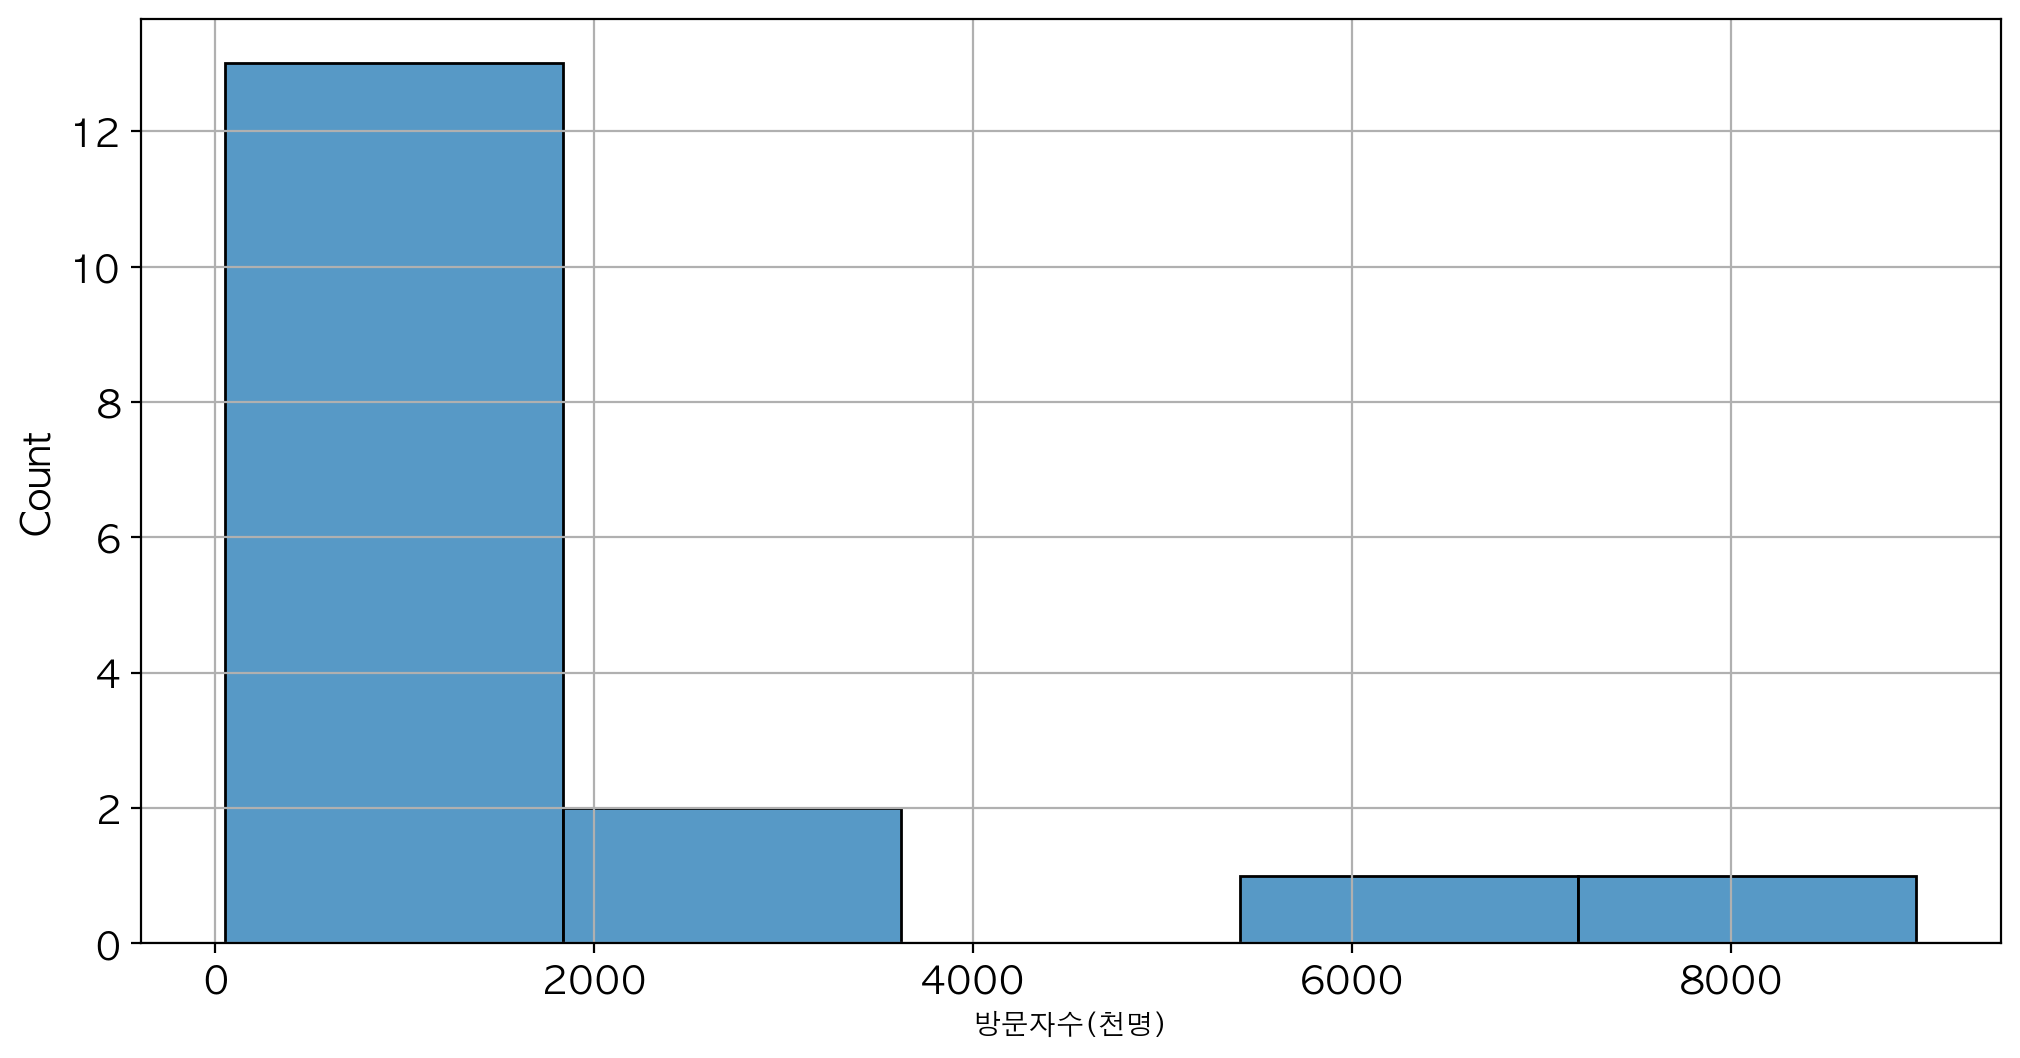

In [13]:
plt.figure()
sb.histplot(data=df2, x = '방문자수', bins=5)
plt.grid()
#plt.title('방문자수 히스토그램')
plt.xlabel('방문자수(천명)', fontdict={'size':10})
plt.show()
plt.close()

In [14]:
hist, bins = np.histogram(df2['방문자수'],5)
print('구간별데이터수(리스트):', hist)
print('구간경계(리스트):', bins)

구간별데이터수(리스트): [13  2  0  1  1]
구간경계(리스트): [  51.758  1836.8422 3621.9264 5407.0106 7192.0948 8977.179 ]


In [15]:
#전국지도 시각화

In [16]:
df_map = df2[['방문자수']]
df_map['두글자']= ['서울', '부산', '대구', '인천', '광주', '대전', '울산', '세종', '경기', '강원', '충북', '충남',
       '전북', '전남', '경북', '경남', '제주']
df_map= df_map.set_index('두글자')
df_map


/var/folders/7s/11f9ngv16yd4rmc74hx3y3w80000gp/T/ipykernel_79962/3911099216.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_map['두글자']= ['서울', '부산', '대구', '인천', '광주', '대전', '울산', '세종', '경기', '강원', '충북', '충남',


,방문자수
두글자,
서울,8977.179000
부산,2210.376000
대구,335.036000
인천,5576.179000
광주,126.989000
대전,180.601000
울산,359.862000
세종,51.758000
경기,3541.064000


In [17]:
session = requests.Session()
r=session.get('https://data.hossam.kr/gisdata/map_sido.svg')

if r.status_code != 200:
    errmsg = '%d %s에러 발생' % (r.status_code, r.reason)
    raise Exception(errmsg)

map_svg = r.text
#SVG(map_svg)

In [18]:
colors = ['#c5cbdd','#7d89ae','#48578f','#39457b','#272c56']
soup = BeautifulSoup(map_svg)
path_list = soup.select('path[name]')
#print(len(path_list))

/var/folders/7s/11f9ngv16yd4rmc74hx3y3w80000gp/T/ipykernel_79962/2090378398.py:2: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  soup = BeautifulSoup(map_svg)


In [19]:
for p in path_list:
    지역명 = p['name']
    인구수 = df_map.loc[지역명, '방문자수']
    #print(지역명, 인구수)

    for i, v in enumerate([  51.758,  1836.8422, 3621.9264, 5407.0106, 7192.0948, 8977.179 ]):
        if i==0:
            continue
        if 인구수 <= v:
            color_index = i-1
            break
    p['fill'] = colors[color_index]

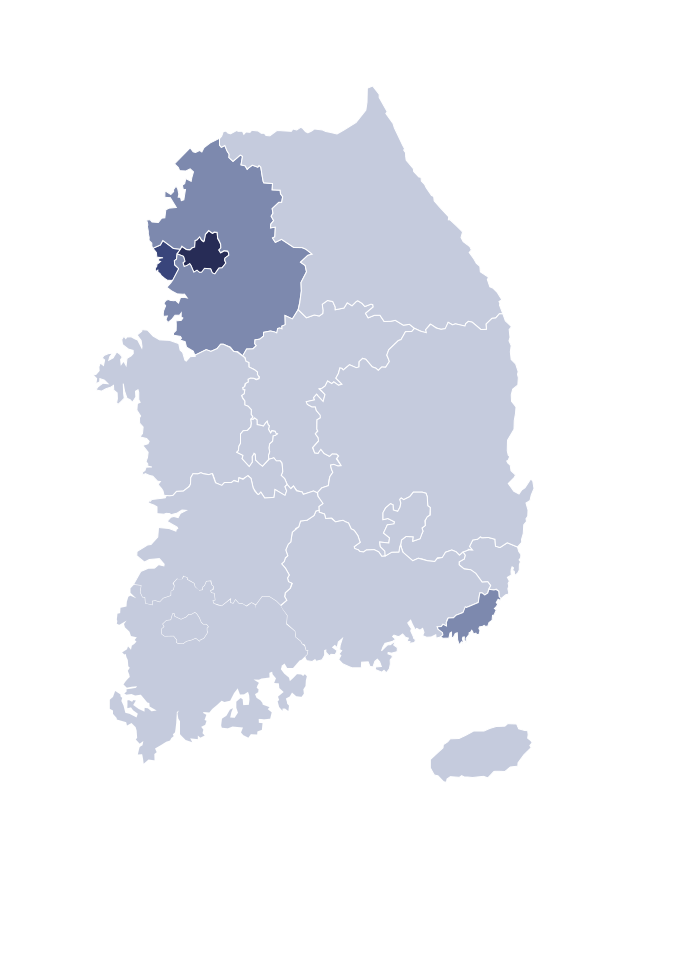

In [20]:
new_svg = soup.prettify()
SVG(new_svg)

### [2] 관광 업종별 지출액 

In [21]:
df3 = DataFrame(df2[['쇼핑업지출액', '숙박업지출액', '식음료업지출액','여가서비스업지출액', '여행업지출액', '운송업지출액']])

합계 = []
for i, v in enumerate(df3.columns):
    합계.append(df3[v].sum(axis=0))

df3.loc['합계'] = 합계

dfa= df3.loc['합계'].T
dfa

쇼핑업지출액       2501233.059
숙박업지출액       1553595.587
식음료업지출액      1243360.357
여가서비스업지출액     443347.639
여행업지출액          9329.458
운송업지출액         68226.944
Name: 합계, dtype: float64

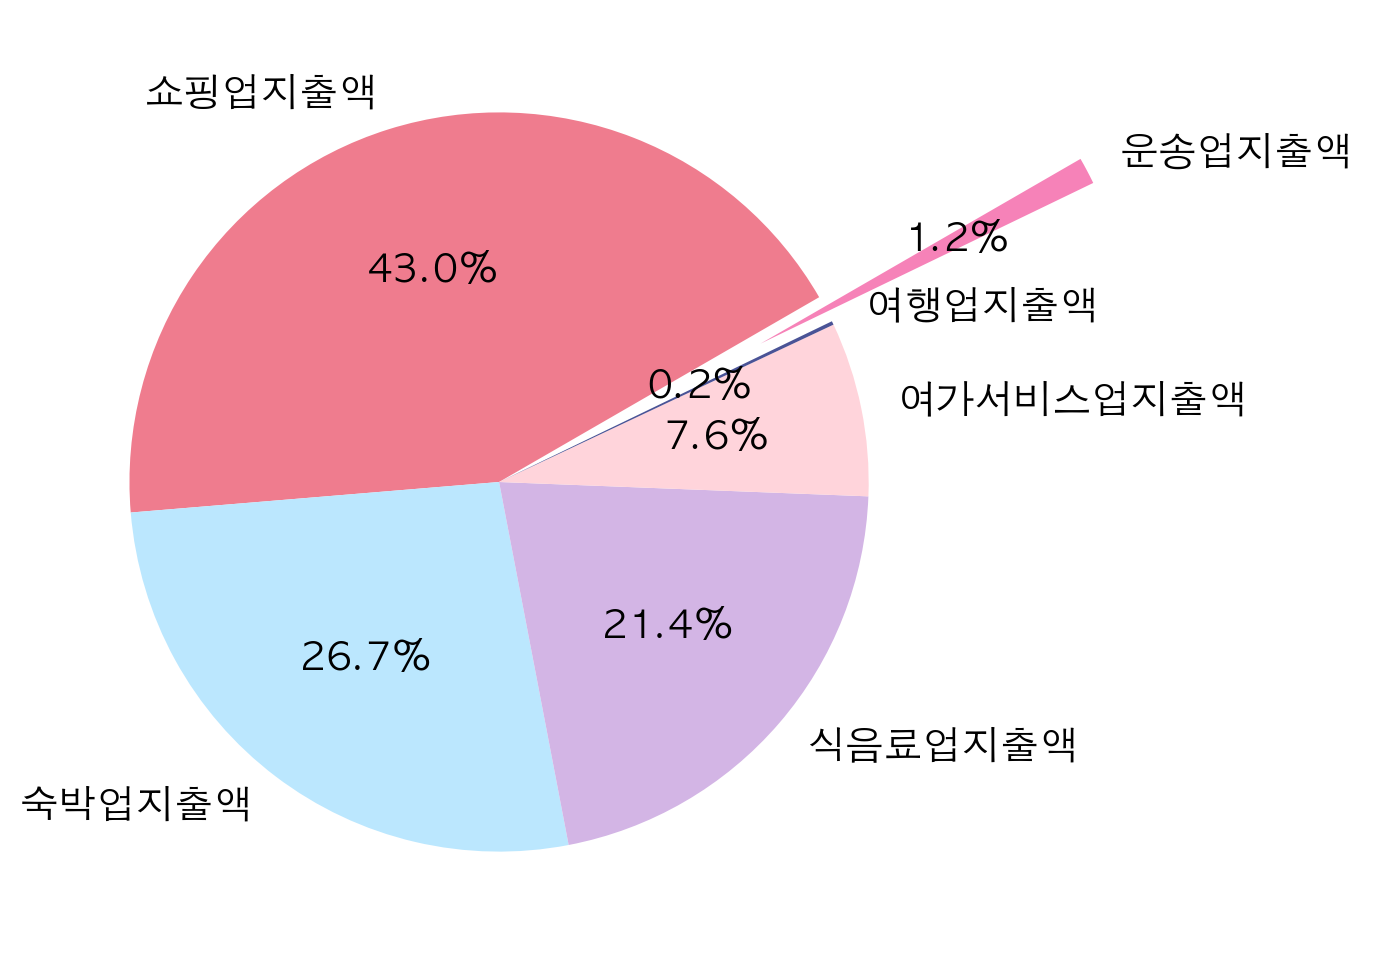

In [22]:
dfa.plot.pie(autopct='%0.1f%%', colors = ['#EF7C8E', '#BBE7FE', '#D3B5E5', '#FFD4DB', '#4a5396', '#f682b8'],
        explode = [0,0,0,0,0,0.8], startangle=30) #해당칼럼명이 ylabel이 됨
plt.ylabel('')
plt.show()
plt.close()

In [23]:
df_heat = df2.sort_values('광역시도', ascending=True)
df_heat= df_heat.set_index('광역시도')
df_heat =df_heat[['쇼핑업지출액', '숙박업지출액',	'식음료업지출액','여가서비스업지출액','여행업지출액','운송업지출액']]
df_heat

,쇼핑업지출액,숙박업지출액,식음료업지출액,여가서비스업지출액,여행업지출액,운송업지출액
광역시도,,,,,,
강원도,4151.907,18740.804,12602.023,3312.939,61.844,104.135
경기도,178954.454,136321.843,153950.917,16717.060,767.952,13731.782
경상남도,13122.105,11070.068,12427.516,1110.851,12.247,233.090
경상북도,4602.937,9482.350,18810.647,1945.973,39.302,412.052
광주광역시,7608.683,2674.535,5573.774,470.083,4.478,40.766
대구광역시,21082.824,13119.634,14403.522,311.389,114.654,236.215
대전광역시,8001.780,8664.649,6427.194,107.498,23.909,14338.333
부산광역시,214505.572,72991.159,73455.474,83108.820,151.071,687.875
서울특별시,1778874.339,968776.600,755894.696,326633.789,7057.795,19166.101


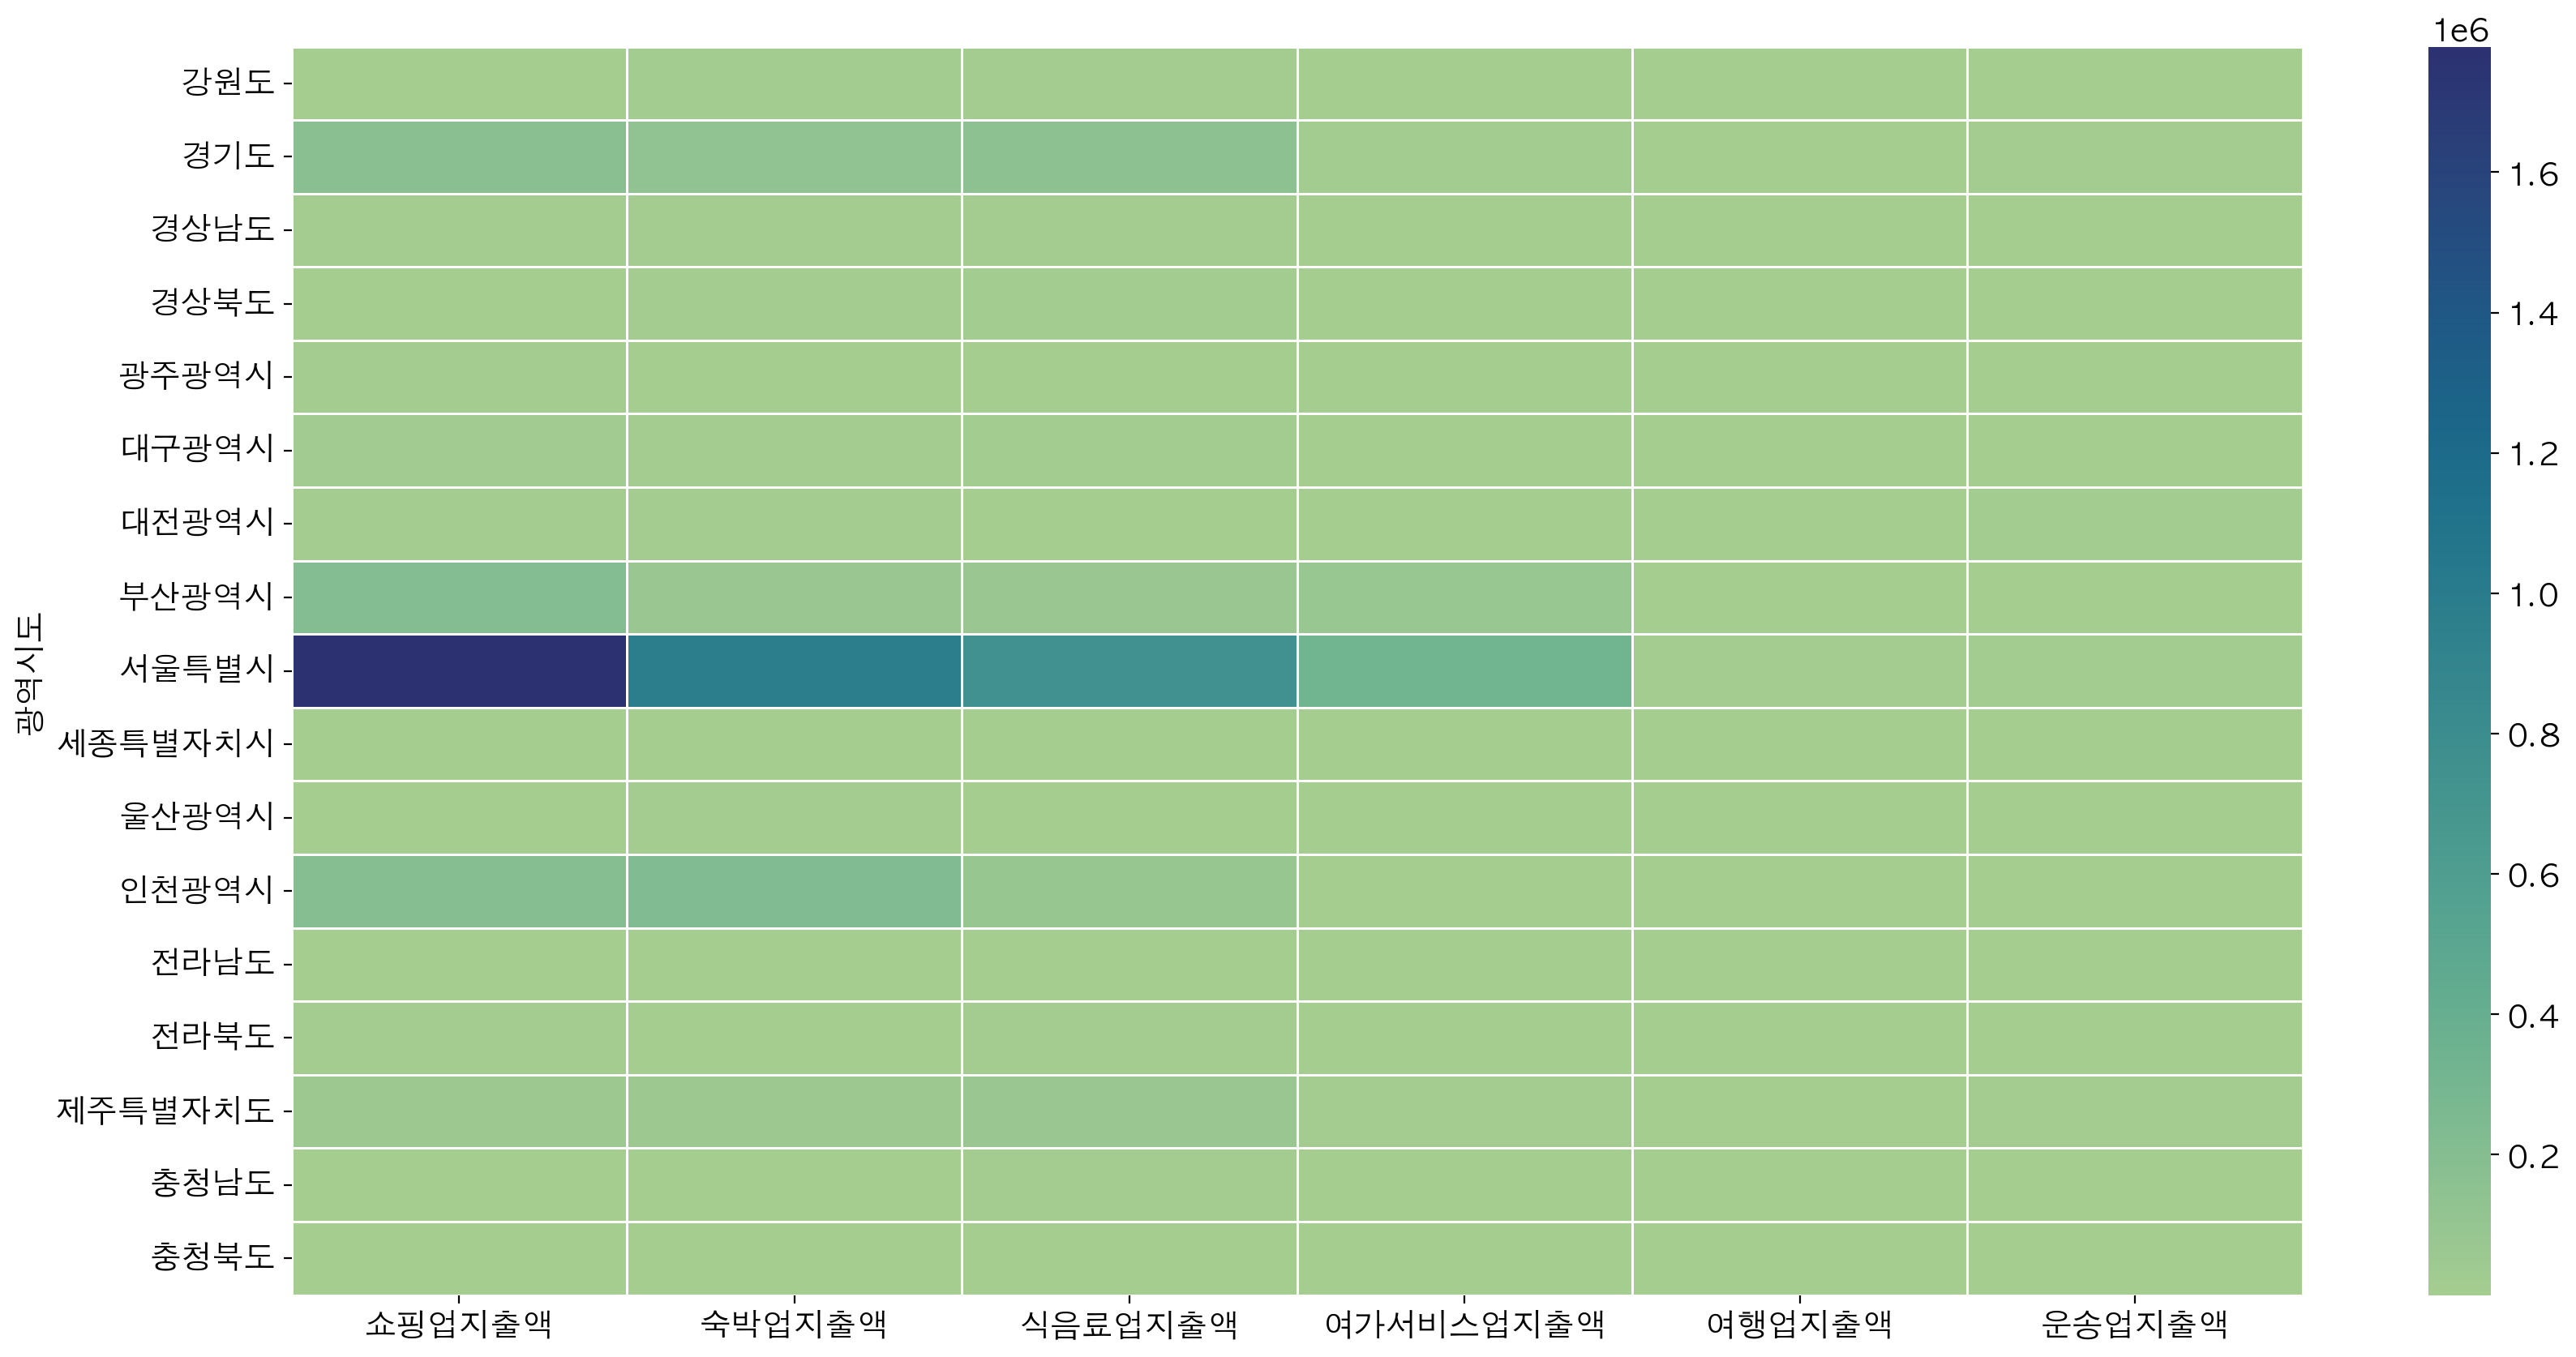

In [24]:
plt.figure(figsize=(20,10))
sb.heatmap(df_heat, annot=False, lw=0.5, cmap='crest')
plt.show()
plt.close()

### [3] 방문자수와 쇼핑업 지출액 관계

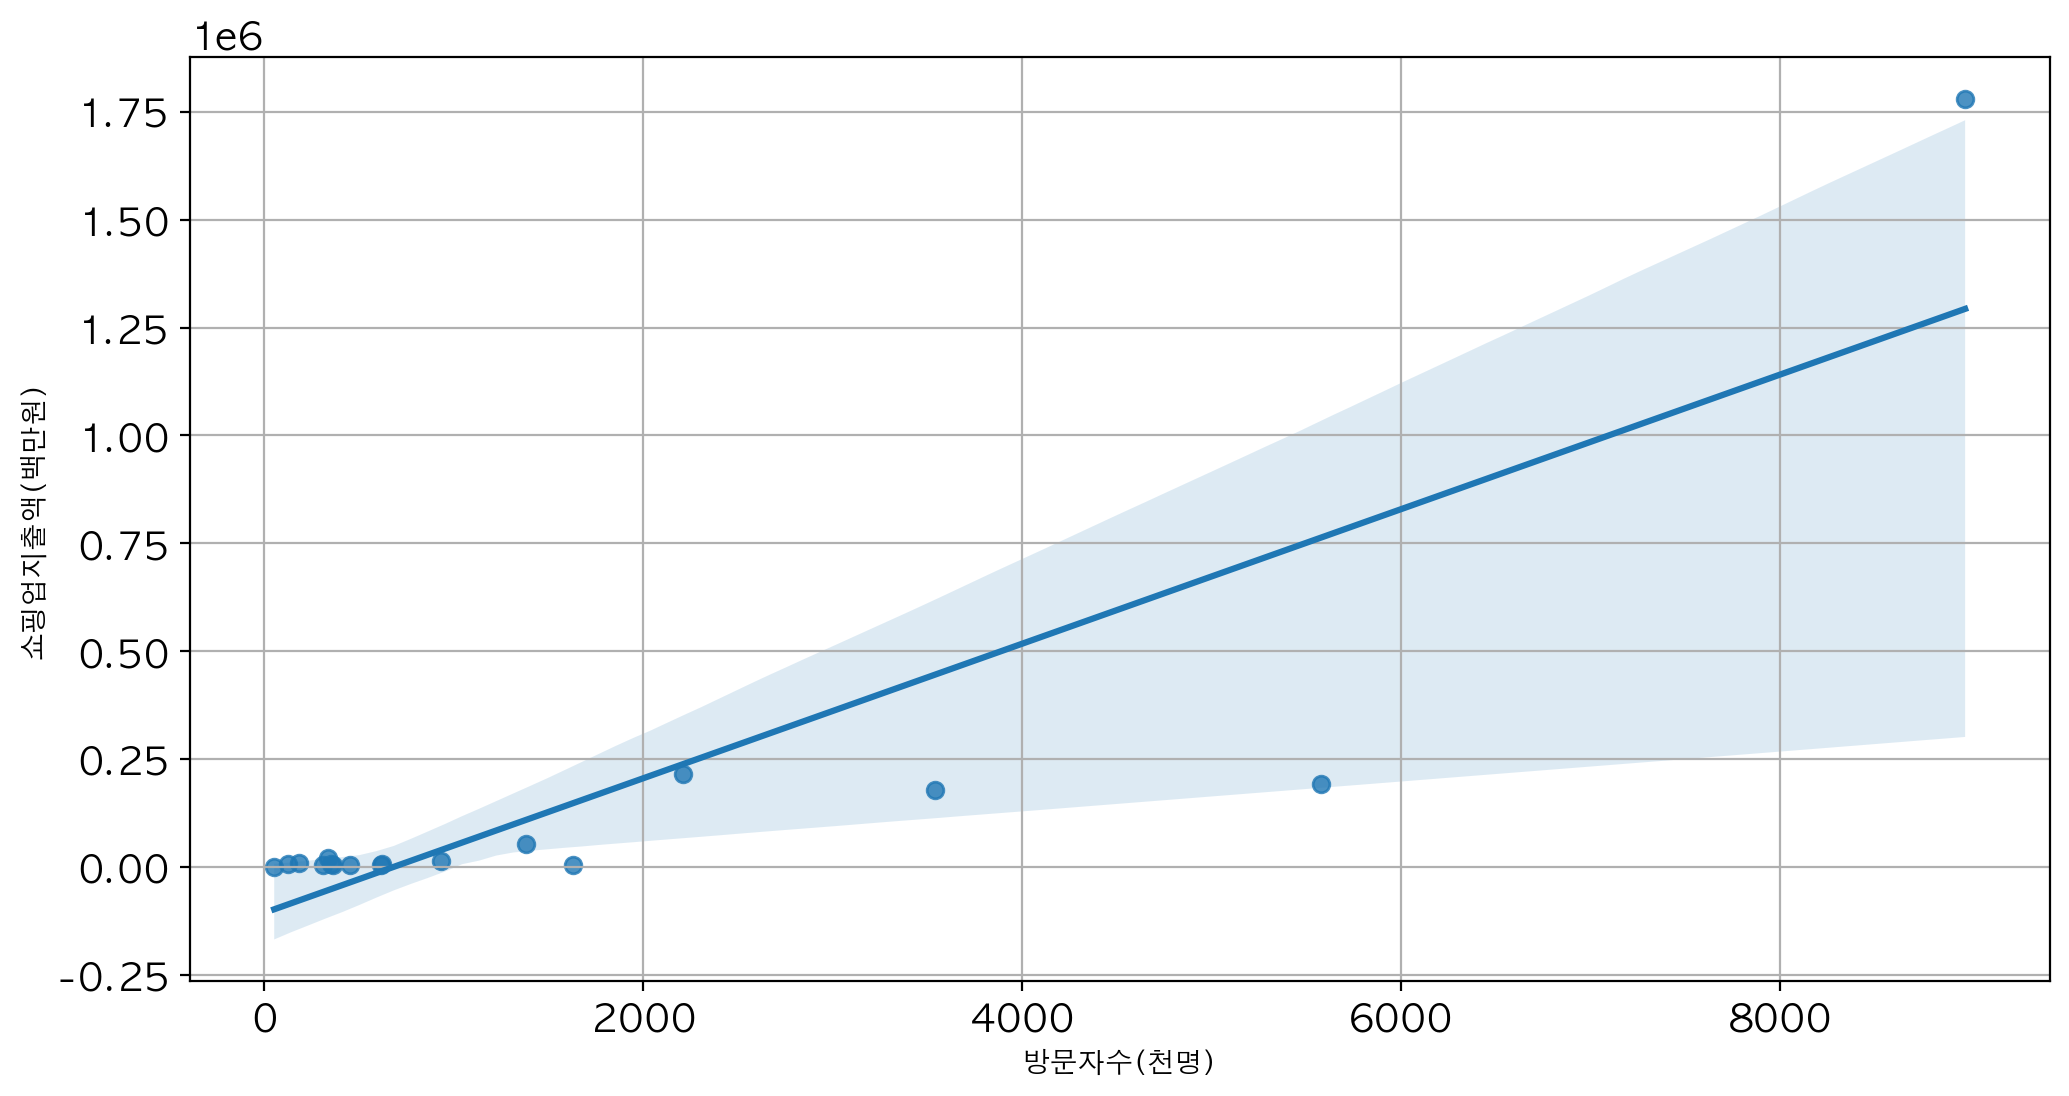

In [25]:
plt.figure()
sb.regplot(data=df2, x='방문자수', y='쇼핑업지출액')
#line_kws={'color': 'skyblue'}, scatter_kws={'color': 'blue'}
#plt.title('방문자수와 쇼핑업지출액 산점도')
plt.xlabel('방문자수(천명)', fontdict={'size':10})
plt.ylabel('쇼핑업지출액(백만원)', fontdict={'size':10})
#plt.legend()
plt.grid()
plt.show()
plt.close()

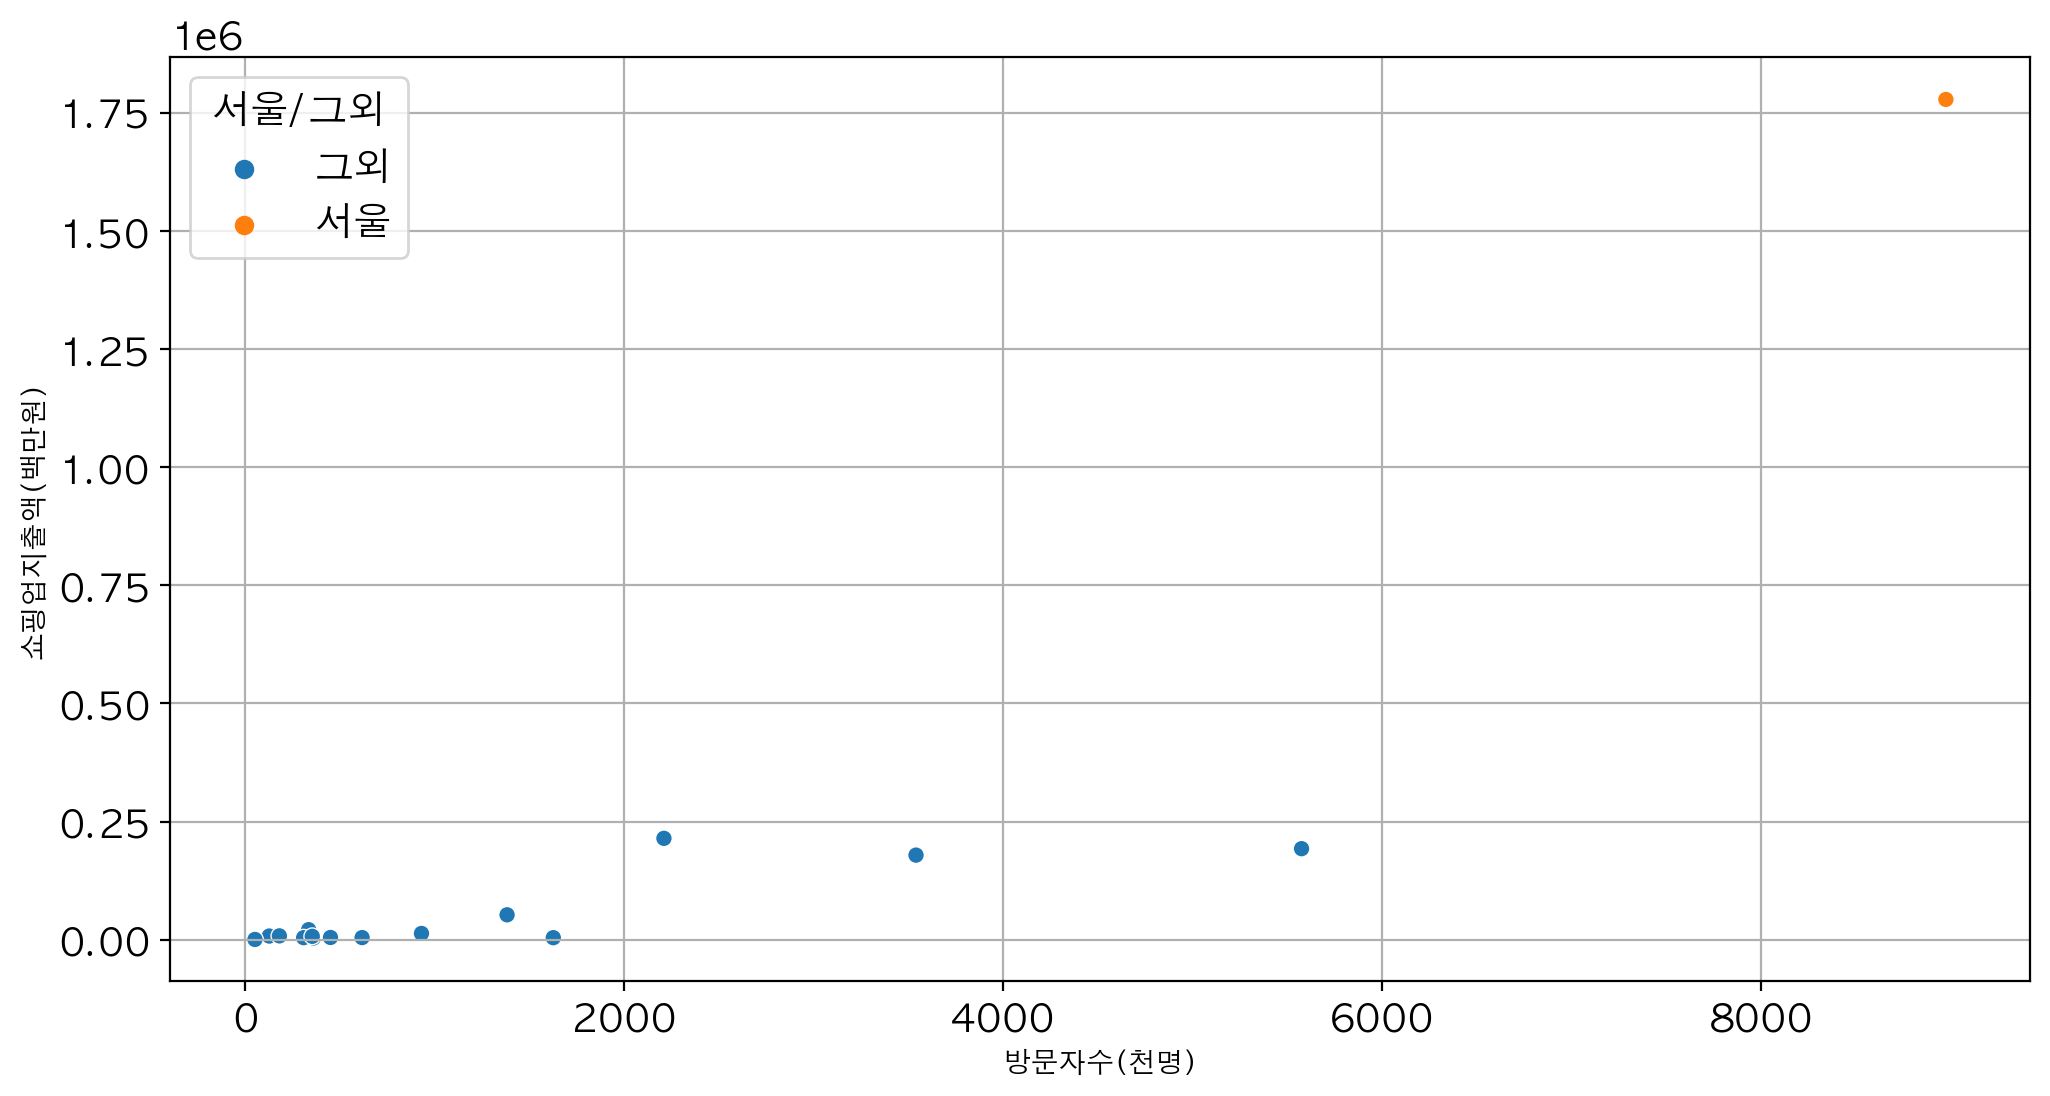

In [26]:
plt.figure()
sb.scatterplot(data=df2, x='방문자수', y='쇼핑업지출액', hue='서울/그외')
#sb.kdeplot(data=df2, x='방문자수', y='총지출액', hue='서울/그외', levels=2)
plt.xlabel('방문자수(천명)', fontdict={'size':10})
plt.ylabel('쇼핑업지출액(백만원)', fontdict={'size':10})
plt.grid()
plt.show()
plt.close()

In [27]:
df_region = origin[['서울/그외','쇼핑업지출액']].groupby('서울/그외').sum()
df_region

,쇼핑업지출액
서울/그외,
그외,722358720
서울,1778874339


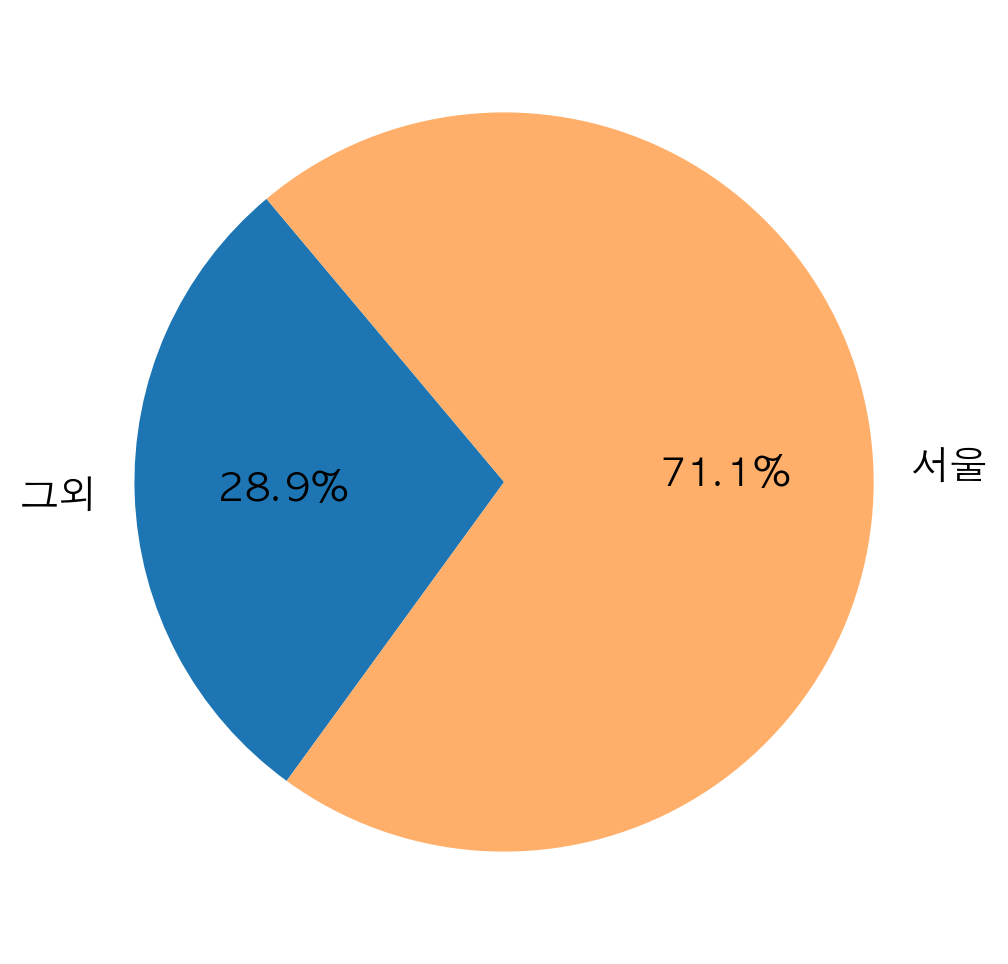

In [28]:
# 내국인 지역별 쇼핑액 비중
df_region['쇼핑업지출액'].plot.pie(autopct='%0.1f%%', colors = ['#1d76b3', '#ffaf69'],
        explode = [0,0], startangle=130) 
plt.ylabel('')
plt.show()
plt.close()

## #04. 쇼핑업 세부 업종별 지출액 - 준비작업
### [1] 데이터 가져오기

In [29]:
origin2 = read_excel("2023외국인쇼핑2.xlsx")
origin2.head()

,광역시도,서울/그외,내/외국인,대분류,중분류,대분류 지출액,중분류 지출액
0,서울특별시,서울,외국인,쇼핑업,관광기념품,1778874339,8.115717e+07
1,서울특별시,서울,외국인,쇼핑업,대형쇼핑몰,1778874339,1.302766e+09
2,서울특별시,서울,외국인,쇼핑업,레저용품쇼핑,1778874339,8.460143e+07
3,서울특별시,서울,외국인,쇼핑업,면세점,1778874339,3.103496e+08
4,부산광역시,그외,외국인,쇼핑업,관광기념품,214505572,6.844237e+06


## #05. 쇼핑업 세부 업종별 지출액 - 데이터 전처리(정제)
### [1] 결측치 확인 및 처리

In [30]:
empty2 = origin2.isnull()
empty2.sum()

광역시도       0
서울/그외      0
내/외국인      0
대분류        0
중분류        0
대분류 지출액    0
중분류 지출액    7
dtype: int64

In [31]:
origin2 = origin2.fillna(value=0)

In [32]:
empty2 = origin2.isnull()
empty2.sum()

광역시도       0
서울/그외      0
내/외국인      0
대분류        0
중분류        0
대분류 지출액    0
중분류 지출액    0
dtype: int64

### [2] 지출액 > 백만원 단위로 변경

In [33]:
df66 = origin2[['광역시도', '내/외국인', '서울/그외', '대분류', '중분류']]

for i, v in enumerate(origin2.columns[5:]):
    df66[v] = origin2[v].divide(1000)

df66

/var/folders/7s/11f9ngv16yd4rmc74hx3y3w80000gp/T/ipykernel_79962/3491634129.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df66[v] = origin2[v].divide(1000)


,광역시도,내/외국인,서울/그외,대분류,중분류,대분류 지출액,중분류 지출액
0,서울특별시,외국인,서울,쇼핑업,관광기념품,1778874.339,81157.168
1,서울특별시,외국인,서울,쇼핑업,대형쇼핑몰,1778874.339,1302766.095
2,서울특별시,외국인,서울,쇼핑업,레저용품쇼핑,1778874.339,84601.430
3,서울특별시,외국인,서울,쇼핑업,면세점,1778874.339,310349.646
4,부산광역시,외국인,그외,쇼핑업,관광기념품,214505.572,6844.237
...,...,...,...,...,...,...,...
63,경상남도,외국인,그외,쇼핑업,면세점,13122.105,0.010
64,제주특별자치도,외국인,그외,쇼핑업,관광기념품,52567.797,7415.303
65,제주특별자치도,외국인,그외,쇼핑업,대형쇼핑몰,52567.797,18723.134
66,제주특별자치도,외국인,그외,쇼핑업,레저용품쇼핑,52567.797,7211.525


### [3] 데이터 타입 변경

In [34]:
df66= df66.astype({'광역시도' : 'category', '내/외국인' : 'category', '서울/그외' : 'category', '대분류' : 'category', '중분류' : 'category'})
df66.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   광역시도     68 non-null     category
 1   내/외국인    68 non-null     category
 2   서울/그외    68 non-null     category
 3   대분류      68 non-null     category
 4   중분류      68 non-null     category
 5   대분류 지출액  68 non-null     float64 
 6   중분류 지출액  68 non-null     float64 
dtypes: category(5), float64(2)
memory usage: 2.7 KB


### [4] 기술통계량 확인

In [35]:
df66.describe()

,대분류 지출액,중분류 지출액
count,6.800000e+01,6.800000e+01
mean,1.471314e+05,3.678284e+04
std,4.171823e+05,1.640554e+05
min,4.183880e+02,0.000000e+00
25%,4.351206e+03,1.973400e+01
50%,7.608683e+03,6.059650e+02
75%,5.256780e+04,7.132166e+03
max,1.778874e+06,1.302766e+06


## #06. 쇼핑업 세부 업종별 지출액 - 데이터 시각화
### [1] 지역별 특징

In [36]:
df77 = df66[['서울/그외','중분류', '중분류 지출액']].groupby(['서울/그외','중분류'], as_index=False).sum()
df77

,서울/그외,중분류,중분류 지출액
0,그외,관광기념품,19236.408
1,그외,대형쇼핑몰,469080.429
2,그외,레저용품쇼핑,38579.760
3,그외,면세점,195462.123
4,서울,관광기념품,81157.168
5,서울,대형쇼핑몰,1302766.095
6,서울,레저용품쇼핑,84601.430
7,서울,면세점,310349.646


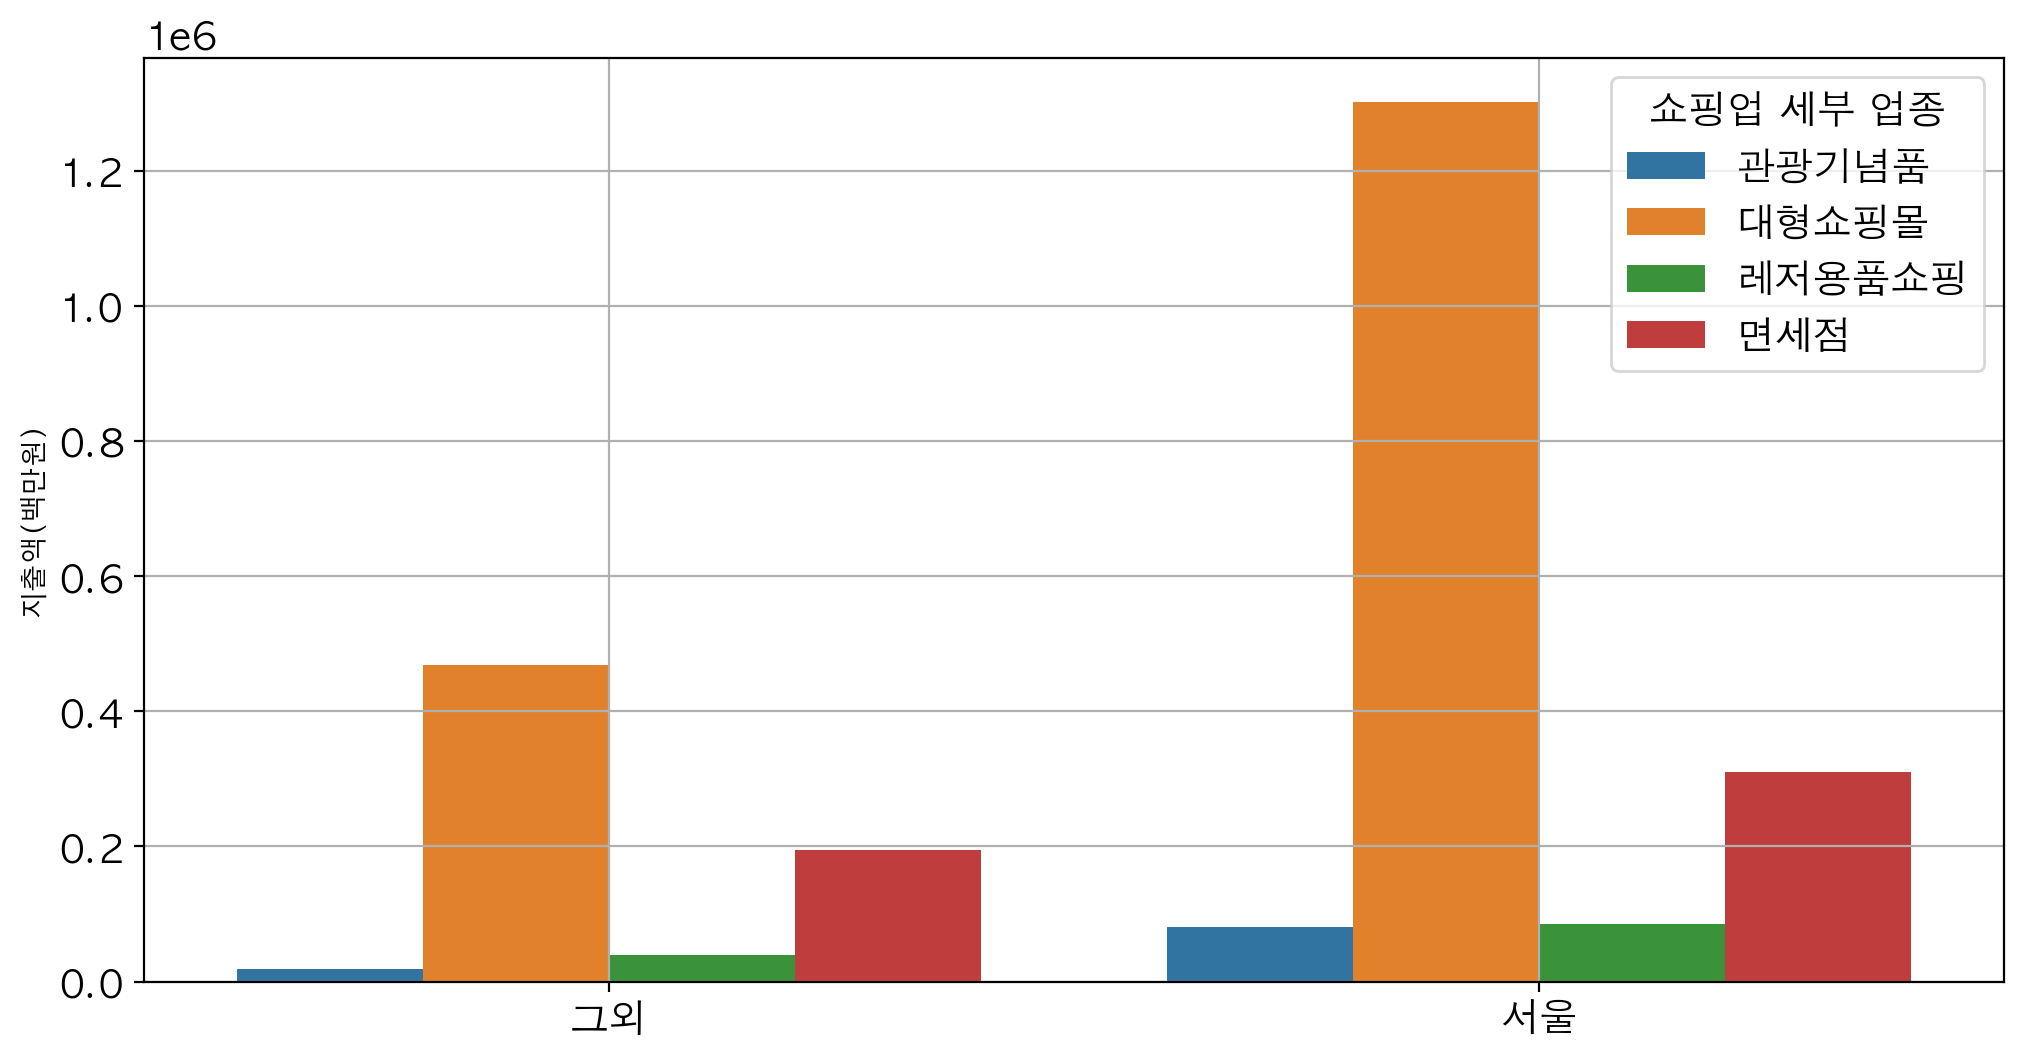

In [37]:
plt.figure()
sb.barplot(data=df77, x= '서울/그외', y = '중분류 지출액', hue= '중분류')
plt.grid()
plt.legend(title= '쇼핑업 세부 업종')
plt.ylabel('지출액(백만원)', fontdict={'size':10})
plt.xlabel('', fontdict={'size':10})
plt.show()
plt.close()
# 그래프 설명에서 세부 업종에 속하는 내용 추가?


In [38]:
df88 = df66[['광역시도', '중분류', '중분류 지출액']].groupby(['중분류','광역시도',], as_index=False).sum()
df88

,중분류,광역시도,중분류 지출액
0,관광기념품,강원도,115.338
1,관광기념품,경기도,2872.455
2,관광기념품,경상남도,61.359
3,관광기념품,경상북도,195.147
4,관광기념품,광주광역시,9.516
...,...,...,...
63,면세점,전라남도,6.118
64,면세점,전라북도,0.000
65,면세점,제주특별자치도,19217.835
66,면세점,충청남도,0.000


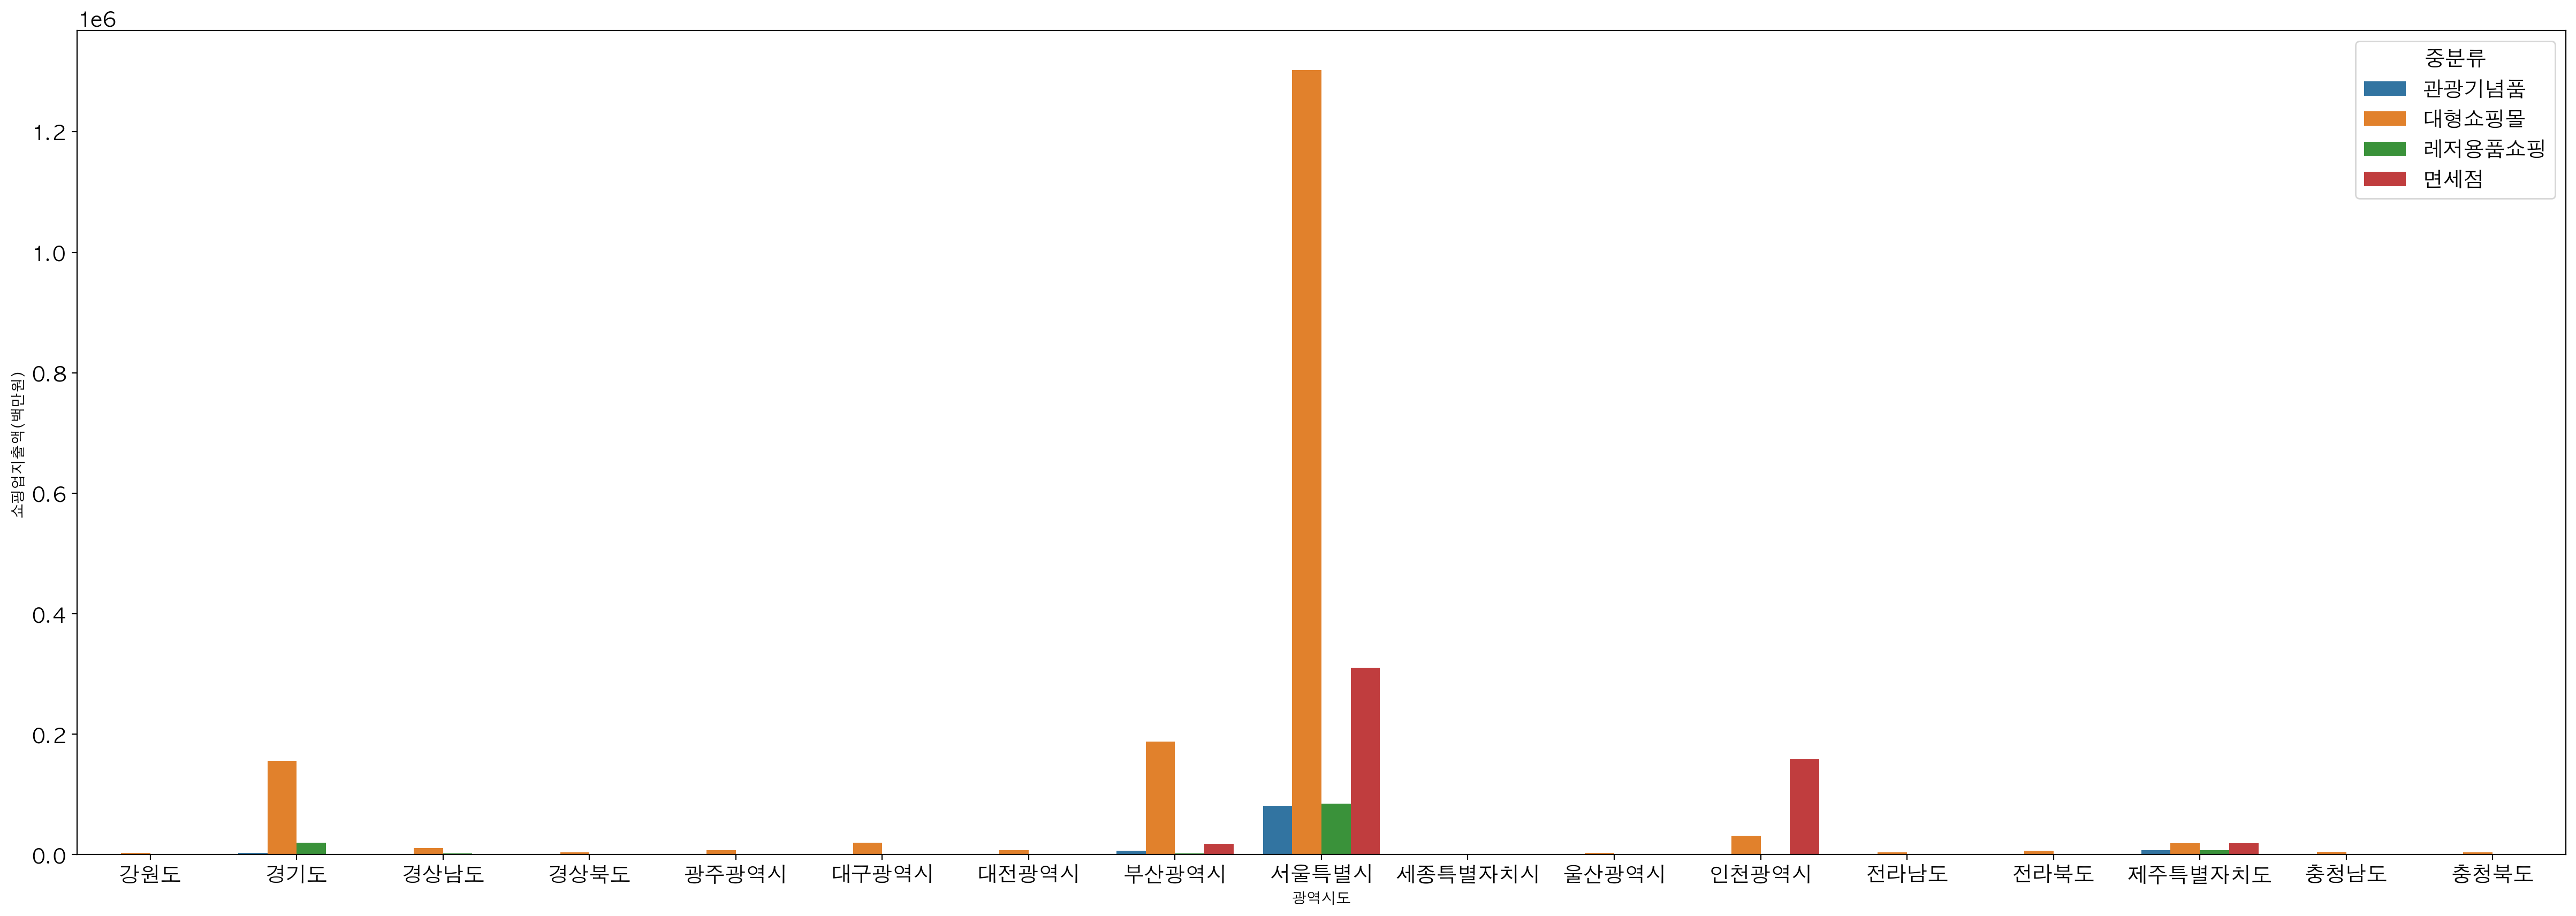

In [39]:
plt.figure(figsize=(30,10))
sb.barplot(data=df88, x='광역시도', y='중분류 지출액', hue='중분류')
plt.xticks(rotation=0)
plt.xlabel('광역시도', fontdict={'size':10})
plt.ylabel('쇼핑업지출액(백만원)', fontdict={'size':10})
plt.show()
plt.close()

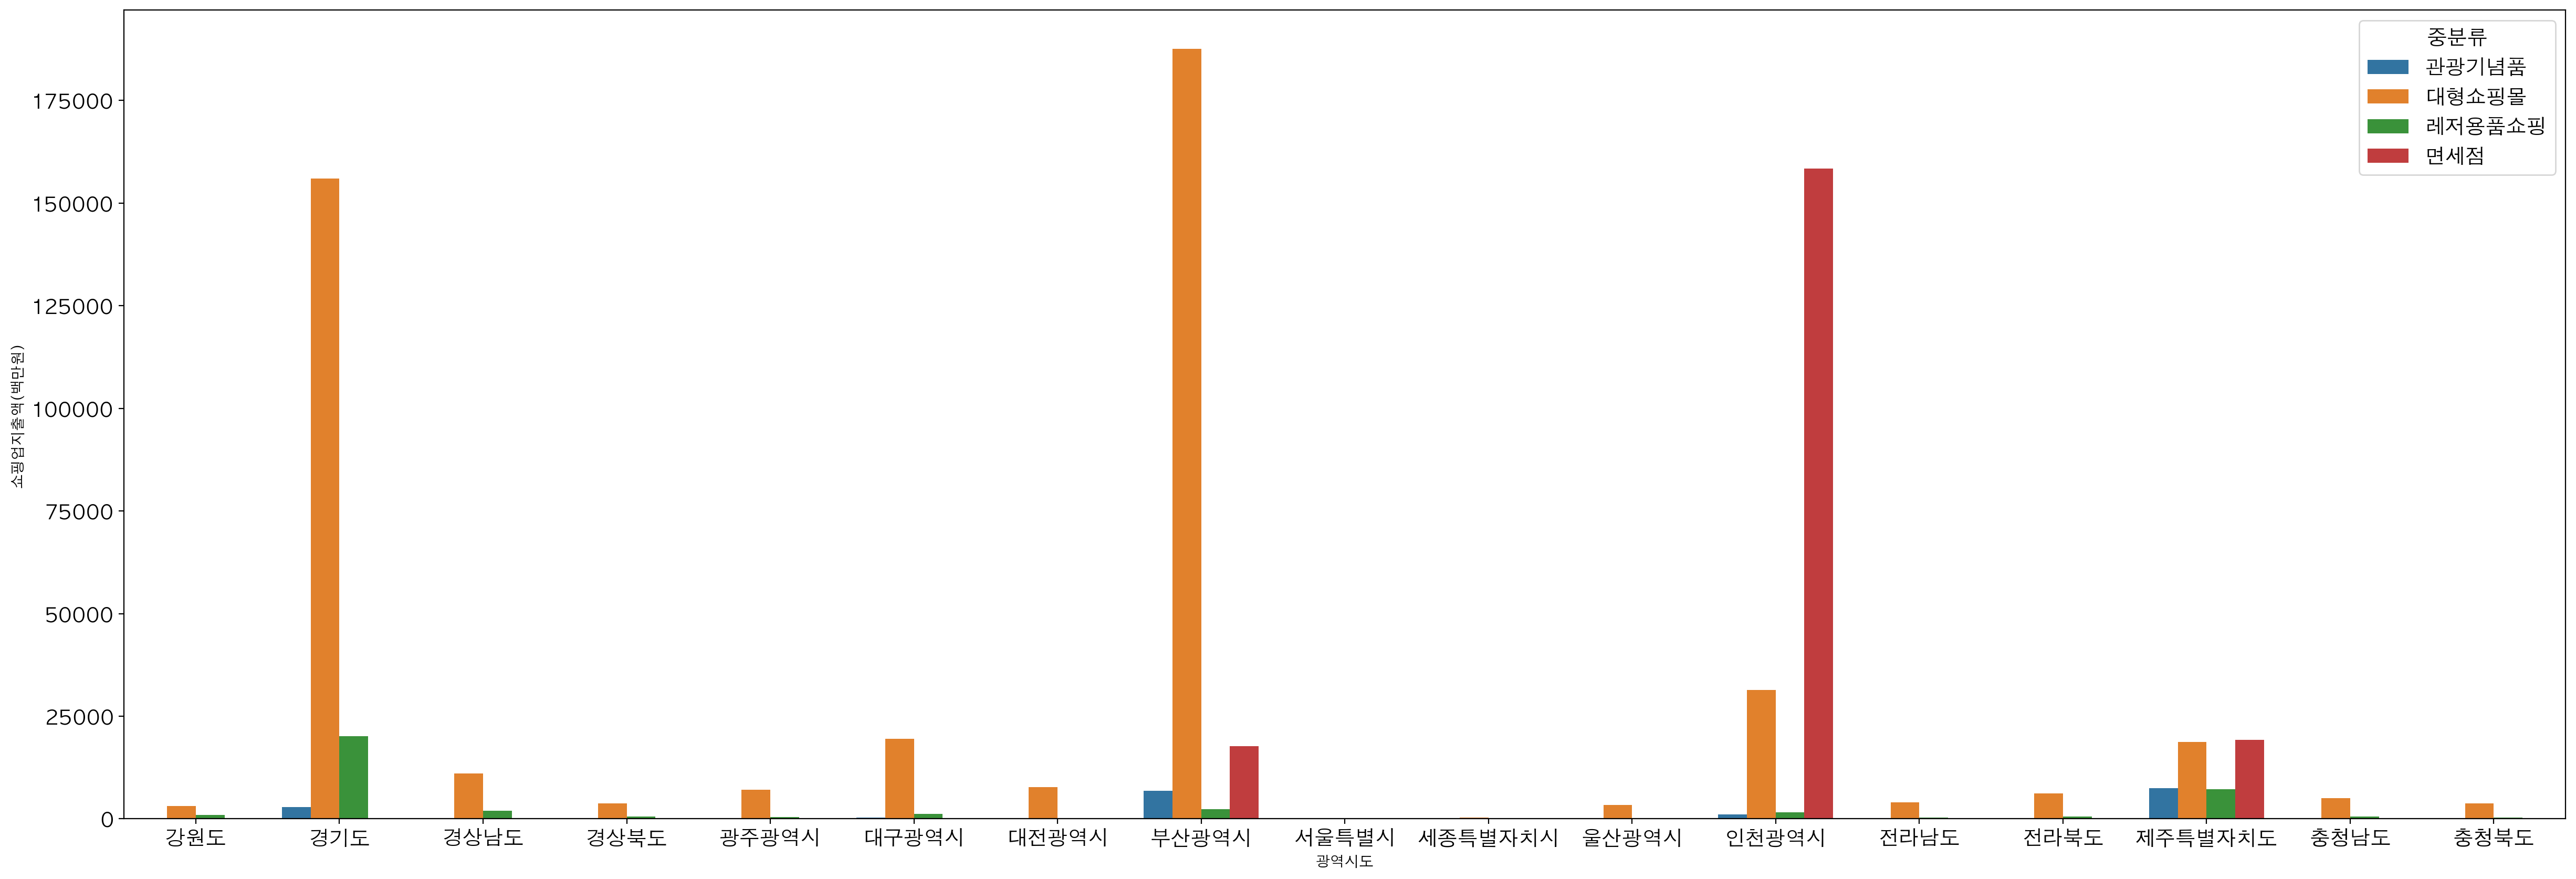

In [40]:
plt.figure(figsize=(30,10))
sb.barplot(data=df88[df88['광역시도'] != '서울특별시'], x='광역시도', y='중분류 지출액', hue='중분류')
plt.xticks(rotation=0)
plt.xlabel('광역시도', fontdict={'size':10})
plt.ylabel('쇼핑업지출액(백만원)', fontdict={'size':10})
plt.show()
plt.close()